In [189]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
#f_path = "/Library/Fonts/AppleGothic.ttf (맥, Mac)
f_path = "C:/Windows/Fonts/malgun.ttf"
#(윈도우즈,Windows)
font_name = font_manager.FontProperties(fname= f_path).get_name()
rc('font', family = font_name)

In [197]:
data1 = pd.read_csv('../data/dust/april_4.csv',  encoding = 'CP949')
data2 = pd.read_csv('../data/dust/august_8.csv', encoding= 'CP949')
data3 = pd.read_csv('../data/dust/december_12.csv', encoding= 'CP949')
data4 = pd.read_csv('../data/dust/feburary_2.csv', encoding= 'CP949')
data5 = pd.read_csv('../data/dust/january_1.csv', encoding= 'CP949')
data6 = pd.read_csv('../data/dust/july_7.csv', encoding= 'CP949')
data7 = pd.read_csv('../data/dust/june_6.csv', encoding= 'CP949')
data8 = pd.read_csv('../data/dust/march_3.csv', encoding= 'CP949')
data9 = pd.read_csv('../data/dust/may_5.csv', encoding= 'CP949')
data10 = pd.read_csv('../data/dust/november_11.csv', encoding= 'CP949')
data11 = pd.read_csv('../data/dust/october_10.csv', encoding= 'CP949')
data12 = pd.read_csv('../data/dust/september_9.csv', encoding= 'CP949')

data1.fillna(0, inplace = True)
data2.fillna(0, inplace = True)
data3.fillna(0, inplace = True)
data4.fillna(0, inplace = True)
data5.fillna(0, inplace = True)
data6.fillna(0, inplace = True)
data7.fillna(0, inplace = True)
data8.fillna(0, inplace = True)
data9.fillna(0, inplace = True)
data10.fillna(0, inplace = True)
data11.fillna(0, inplace = True)
data12.fillna(0, inplace = True)

tot_data = pd.merge(data1, data2, on = "...1")
tot_data = pd.merge(tot_data, data3, on = "...1")
tot_data = pd.merge(tot_data, data4, on = "...1")
tot_data = pd.merge(tot_data, data5, on = "...1")
tot_data = pd.merge(tot_data, data6, on = "...1")
tot_data = pd.merge(tot_data, data7, on = "...1")
tot_data = pd.merge(tot_data, data8, on = "...1")
tot_data = pd.merge(tot_data, data9, on = "...1")
tot_data = pd.merge(tot_data, data10, on = "...1")
tot_data = pd.merge(tot_data, data11, on = "...1")
tot_data = pd.merge(tot_data, data12, on = "...1")
                   
names = data1['...1']
total = pd.DataFrame({'Area': names})

tot_data.head()

,Unnamed: 0_x,...1,X1_x,X2_x,X3_x,X4_x,X5_x,X6_x,X7_x,X8_x,...,X22_y,X23_y,X24_y,X25_y,X26_y,X27_y,X28_y,X29_y,X30_y,X31_y
0,1,서울시 평균,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2,2,1,1,2,2,0.0
1,2,종로구,1.0,2.0,1.0,2.0,2.0,2.0,2.0,2.0,...,1,1,2,2,2,1,1,1,2,0.0
2,3,중구,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,...,2,2,2,2,2,1,1,2,2,0.0
3,4,용산구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,1,2,2,2,1,1,1,2,0.0
4,5,성동구,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,...,2,2,3,2,2,1,1,2,2,0.0


In [201]:
tot_slice = tot_data.iloc[:,1:tot_data.shape[1]]
tot_slice = pd.melt(tot_slice, id_vars = "...1")
def count2(vec):
    count = 0
    for i in vec:
        if (i == 2) or (i == 2.0):
            count+=1
       
    return count

def count1(vec):
    count = 0
    for i in vec:
        if (i == 1) or (i == 1.0):
            count+=1
       
    return count

def count3(vec):
    count = 0
    for i in vec:
        if (i == 3) or (i == 3.0):
            count+=1
       
    return count

def count0(vec):
    count = 0
    for i in vec:
        if (i == 0) or (i == 0.0):
            count+=1
       
    return count
total['0.0 count'] = tot_slice.apply(count0, axis = 1)
total['1.0 count'] = tot_slice.apply(count1, axis = 1)
total['2.0 count'] = tot_slice.apply(count2, axis = 1)
total['3.0 count'] = tot_slice.apply(count3, axis = 1)
total
data1.shape[1]

33

In [204]:
total.head()
tot_slice.groupby(['...1', 'value']).count().reset_index().head()

,...1,value,variable
0,강남구,0.0,71
1,강남구,1.0,141
2,강남구,2.0,138
3,강남구,3.0,22
4,강남구,24.0,11


In [193]:
total_melt = pd.melt(total, id_vars = ['Area'],
                      var_name = 'Element', value_name = 'Count',)

total_melt.head()

,Area,Element,Count
0,서울시 평균,0.0 count,50
1,종로구,0.0 count,60
2,중구,0.0 count,54
3,용산구,0.0 count,88
4,성동구,0.0 count,35


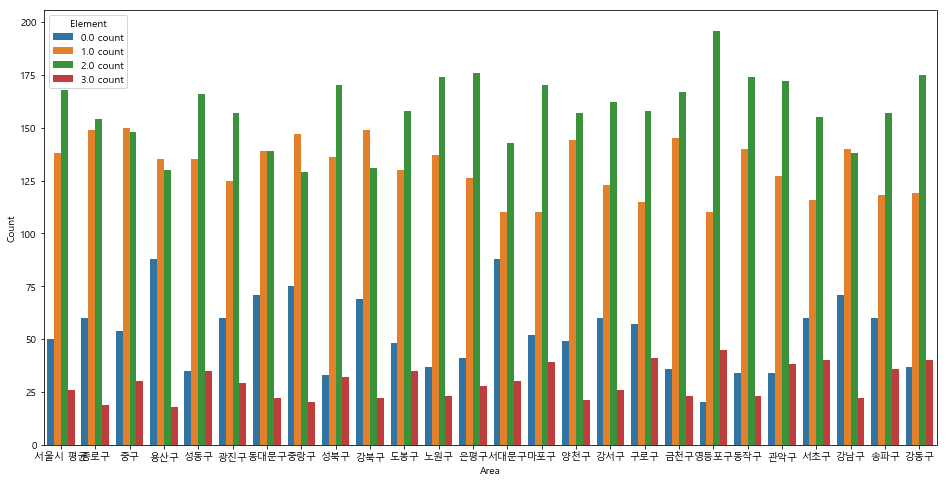

In [194]:
ax = plt.subplots(figsize = (16,8))
ax = sns.barplot(x='Area',y="Count",hue="Element",data=total_melt)